# Statistical Inference Using Simulation
## Statistical Computing Activity W4

ASUNCION, Juan Rico G. | B37 | 01/03/2024

### Instructions

Simulate the following distributions using `numpy` with the following criteria:

1. Provide your own test statistic and parameters (number of trials, lambda, df)
2. Number of simulations must be **at least** `10000`
3. Create a visualization of the simulated data filtered by its test statistic

Extra Credit: Check the observed value if it's relatively close to its computed (theoretical) value. You may use other libraries such as `scipy` or `statsmodels` for computing theoretical values.

### Rubrics (Per Item)
- Results Accuracy (5 pts)
- Code Execution, Formatting, and Cleanliness (5 pts)
- Visualization (5 pts)

#### 1. Poisson Distribution

<h3>$$P_x=\frac{\lambda^x}{x!}e^{-\lambda}$$</h3>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson

In [2]:
mean_of_success = 5
num_of_sim = 10000
num_of_success = 9
data = poisson.rvs(mu = mean_of_success, size = num_of_sim)
bound_data = data > 9
bound_data.mean()

0.0318

In [3]:
theoretical = 1-poisson.cdf(mu = mean_of_success, k = 9)
theoretical

0.03182805730620486

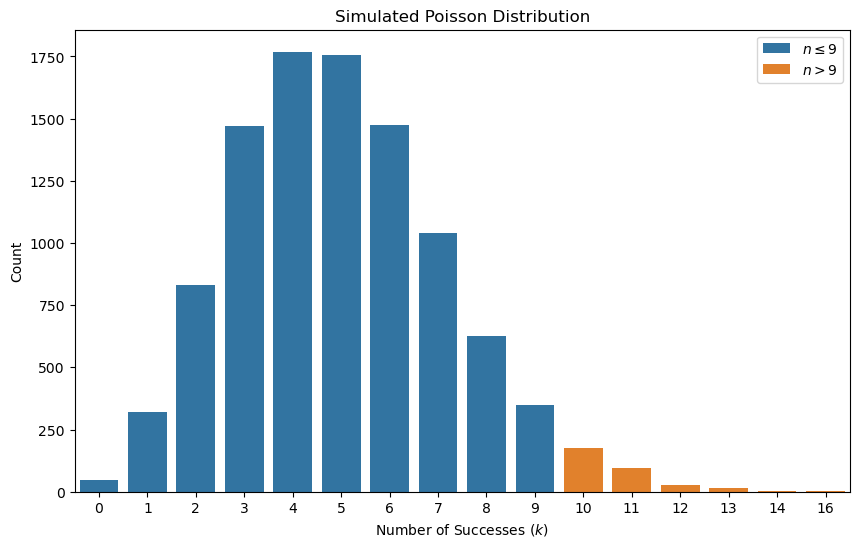

In [4]:
fig, ax = plt.subplots(figsize=(10,6))

sns.countplot(x=data, hue=bound_data, dodge=False)

ax.set_xlabel('Number of Successes $(k)$')
ax.set_ylabel('Count')
ax.set_title('Simulated Poisson Distribution')

ax.legend([f'$n\leq${num_of_success}',f'$n > ${num_of_success}'])

plt.show()

#### 2. Hypergeometric Distribution

<h2>$$P_x=\frac{\binom{g}{x}\binom{b}{n-x}}{\binom{g+b}{n}}$$</h2>

In [5]:
from scipy.stats import hypergeom
import numpy as np

In [6]:
population_size = 52 
num_of_success = 4
num_of_draw = 13

num_of_sim = 10000
num_of_observed_success = 3
data = hypergeom.rvs(population_size, num_of_success, num_of_draw, size = num_of_sim)
bound_data = data >= num_of_observed_success
bound_data.mean()

array([0, 3, 2, ..., 0, 0, 0])

In [7]:
theoretical = hypergeom.pmf(num_of_observed_success, population_size, num_of_success, num_of_draw)
theoretical

0.04120048019207683

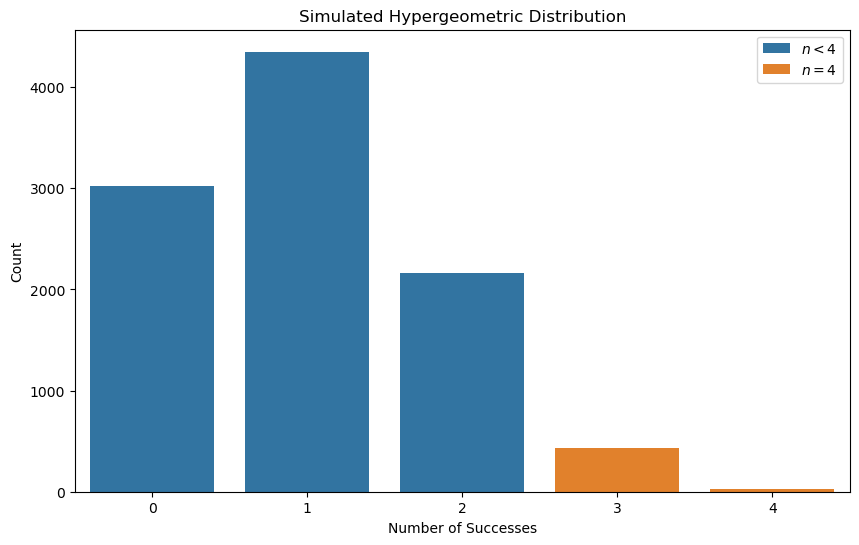

In [8]:
fig, ax = plt.subplots(figsize=(10,6))

sns.countplot(x=data, hue=bound_data, dodge=False)

ax.set_xlabel('Number of Successes')
ax.set_ylabel('Count')
ax.set_title('Simulated Hypergeometric Distribution')

ax.legend([f'$n<${num_of_success}',f'$n = ${num_of_success}'])

plt.show()

#### 3. Exponential Distribution

<h3>$$P_x=\lambda e^{-\lambda x}$$</h3>

In [9]:
from scipy.stats import expon

In [10]:
ave_success = 10
num_of_sim = 10000

data = expon.rvs(scale = 10, size = num_of_sim)
bound_data = data < 5
bound_data.mean()

0.3955

In [11]:
theoretical = expon.cdf(x = 5, scale = 10)
theoretical

0.3934693402873666

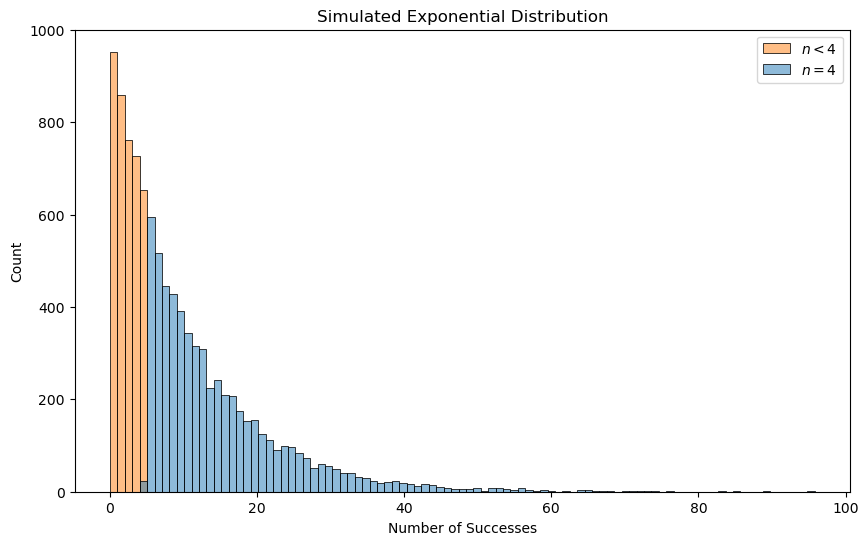

In [12]:
fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(x=data, hue=bound_data)

ax.set_xlabel('Number of Successes')
ax.set_ylabel('Count')
ax.set_title('Simulated Exponential Distribution')

ax.legend([f'$n<${num_of_success}',f'$n = ${num_of_success}'])

plt.show()

#### 4. Chi-Squared Distribution

<h3>$$P_x=\frac{x^{k/2-1}e^{-x/2}}{2^{k/2}\Gamma(k/2)}$$</h3>

In [13]:
from scipy.stats import chi2

In [14]:
X2 = 15
data = chi2.rvs(df=6, size=100000)
bound_data = data >= X2
bound_data.mean()

0.02024

In [15]:
theoretical = chi2.sf(15, df = 6)
theoretical

0.020256715056664387

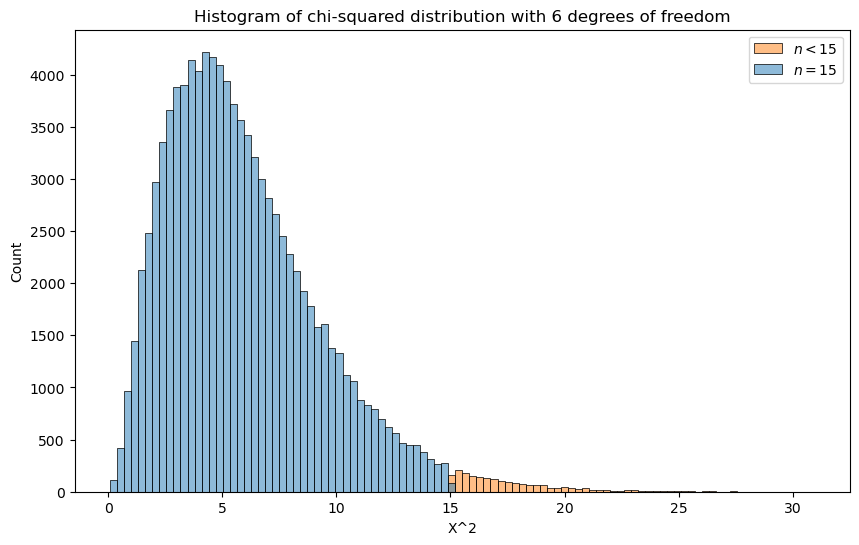

In [16]:
fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(x = data, bins = 100, hue = bound_data)

ax.set_xlabel('X^2')
ax.set_ylabel('Count')
ax.set_title('Histogram of chi-squared distribution with 6 degrees of freedom')

ax.legend([f'$n<${X2}',f'$n = ${X2}'])

plt.show()